In [49]:
! apt-get install -y nco
! pip install metocean_api cartopy nco metocean-stats
from metocean_api import ts
#from metocean_stats.stats import general_stats, dir_stats, extreme_stats, profile_stats
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt


zsh:1: command not found: apt-get
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 6.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [50]:
# Define TimeSeries-object
df_ts = ts.TimeSeries(lon=3.73, lat=64.60,start_time='2020-01-01', end_time='2020-12-31' , product='NORA3_wind_wave')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2021-01-01', end_time='2021-01-15' , product='NORA3_wind_sub')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2021-01-01', end_time='2021-03-31' , product='NORA3_wave_sub')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2000-01-01', end_time='2001-03-31' , product='NORA3_stormsurge')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2021-01-01', end_time='2021-03-31' , product='NORA3_atm_sub')
#df_ts = ts.TimeSeries(lon=3.7, lat=61.8, start_time='2023-01-01', end_time='2023-02-01', product='NORA3_atm3hr_sub')

#%%
# Import data from thredds.met.no and save it as csv
df_ts.import_data(save_csv=True)
#print(df_ts.data)
# Load data from a local csv-file
df_ts.load_data(local_file=df_ts.datafile)
# %%



Directory  cache  already exists
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202001_NORA3wave_sub_time_unlimited.nc
Find nearest point to lon.=3.73,lat.=64.6
Found nearest: lon.=3.7520342,lat.=64.594376
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202002_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202003_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202004_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202005_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202006_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202007_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202008_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subse

In [31]:
df_ts.data

wind_speed_10m  wind_direction_10m  wind_speed_20m  \
time                                                                      
2020-01-01 00:00:00           20.34               249.0           21.46   
2020-01-01 01:00:00           20.13               249.2           21.23   
2020-01-01 02:00:00           19.40               249.2           20.50   
2020-01-01 03:00:00           17.27               254.8           18.15   
2020-01-01 04:00:00           17.80               247.6           18.95   
...                             ...                 ...             ...   
2020-12-31 19:00:00            9.87                 3.3           10.17   
2020-12-31 20:00:00           10.33                 2.9           10.67   
2020-12-31 21:00:00           10.26                 3.1           10.59   
2020-12-31 22:00:00           10.58                 2.4           10.93   
2020-12-31 23:00:00           10.78                 2.0           11.14   

                     wind_direction_20m  wind_speed_50m  wind_direction_50m  \
time                                                                          
2020-01-01 00:00:00               249.1           23.33               249.3   
2020-01-01 01:00:00               249.3           23.12               249.6   
2020-01-01 02:00:00               249.3           22.24               249.6   
2020-01-01 03:00:00               254.8           19.74               255.1   
2020-01-01 04:00:00               247.6           20.61               247.9   
...                                 ...             ...                 ...   
2020-12-31 19:00:00                 3.3           10.62                 3.5   
2020-12-31 20:00:00                 3.0           11.15                 3.1   
2020-12-31 21:00:00                 3.2           11.06                 3.3   
2020-12-31 22:00:00                 2.5           11.44                 2.6   
2020-12-31 23:00:00                 2.0           11.67                 2.1   

                     wind_speed_100m  wind_direction_100m  wind_speed_250m  \
time                                                                         
2020-01-01 00:00:00            24.60                249.6            27.02   
2020-01-01 01:00:00            24.55                250.0            26.95   
2020-01-01 02:00:00            23.76                249.9            26.07   
2020-01-01 03:00:00            21.17                255.5            23.22   
2020-01-01 04:00:00            21.98                248.3            24.16   
...                              ...                  ...              ...   
2020-12-31 19:00:00            10.88                  3.6            11.12   
2020-12-31 20:00:00            11.43                  3.3            11.68   
2020-12-31 21:00:00            11.33                  3.5            11.56   
2020-12-31 22:00:00            11.74                  2.7            12.00   
2020-12-31 23:00:00            11.99                  2.2            12.26   

                     wind_direction_250m  ...  hs_swell     thq  thq_sea  \
time                                      ...                              
2020-01-01 00:00:00                250.7  ...      0.98   71.88    70.24   
2020-01-01 01:00:00                251.1  ...      1.00   72.25    70.83   
2020-01-01 02:00:00                250.9  ...      1.01   73.63    71.91   
2020-01-01 03:00:00                256.4  ...      1.02   74.68    72.17   
2020-01-01 04:00:00                249.4  ...      1.08   75.79    72.43   
...                                  ...  ...       ...     ...      ...   
2020-12-31 19:00:00                  3.9  ...      0.25  173.07   184.52   
2020-12-31 20:00:00                  3.6  ...      0.86  171.82   182.49   
2020-12-31 21:00:00                  4.1  ...      0.85  170.99   181.62   
2020-12-31 22:00:00                  3.0  ...      0.86  170.32   181.07   
2020-12-31 23:00:00                  2.5  ...      0.89  169.34   180.55   

             

<Axes: xlabel='time'>

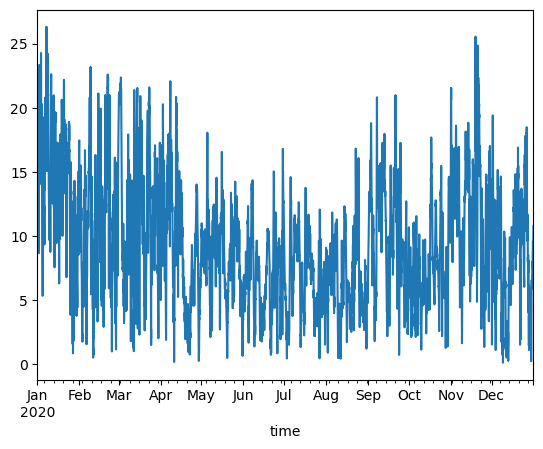

In [8]:
df_ts.data.wind_speed_10m.plot()


In [9]:
np.corrcoef(df_ts.data.wind_speed_10m,df_ts.data.hs_swell)


array([[ 1.        , -0.04540449],
       [-0.04540449,  1.        ]])

In [10]:
pd.Series.autocorr(df_ts.data.wind_speed_10m)

0.9738284659273087

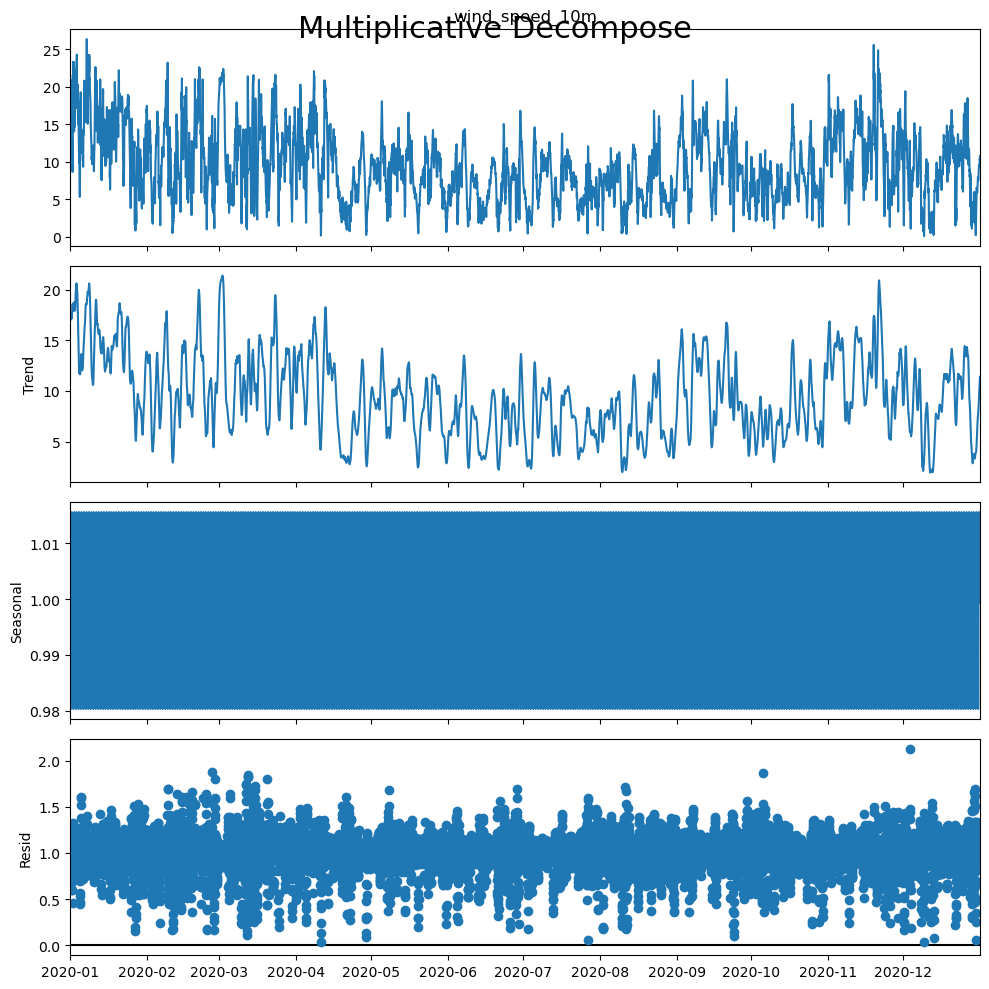

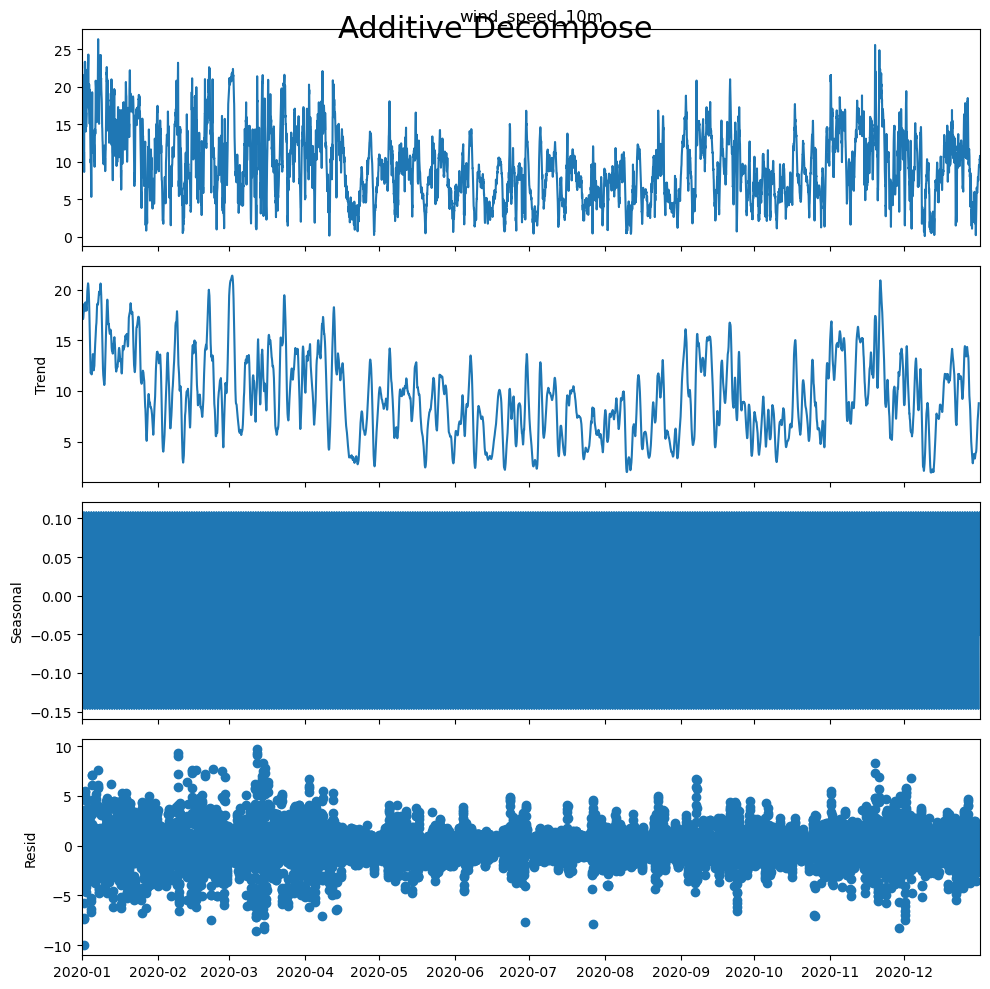

In [16]:
result_mul = seasonal_decompose(df_ts.data.wind_speed_10m, model='multiplicative', extrapolate_trend='freq')
result_add = seasonal_decompose(df_ts.data.wind_speed_10m, model='additive')#, extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

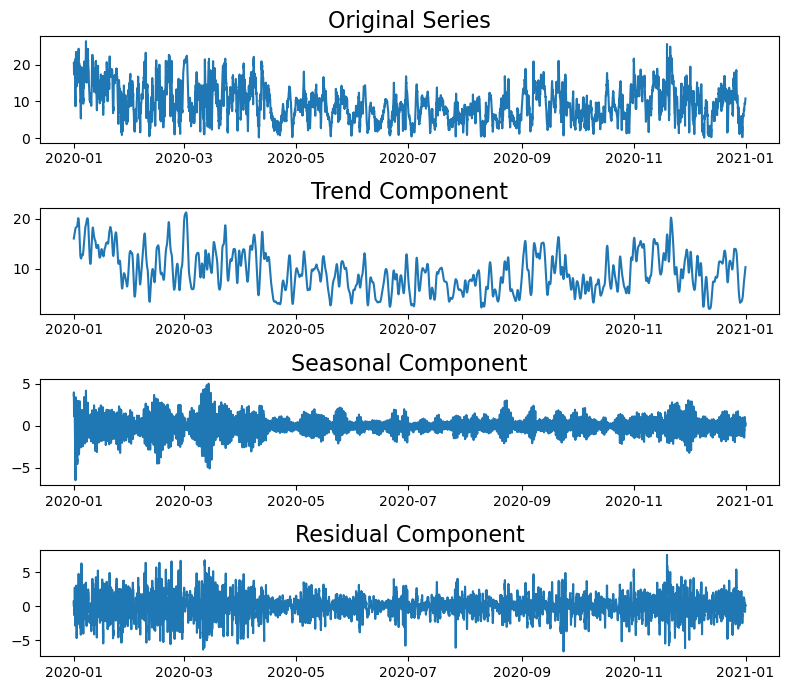

In [20]:
stl = STL(df_ts.data.wind_speed_10m)#, seasonal=13)
result = stl.fit()
# Plot the original time series and the decomposed components
plt.figure(figsize=(8,7))

plt.subplot(411)
plt.plot(result.observed)
plt.title('Original Series', fontsize=16)

plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend Component', fontsize=16)

plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal Component', fontsize=16)

plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual Component', fontsize=16)

plt.tight_layout()
plt.show()

In [47]:
df_E39 = ts.TimeSeries(lon='', lat='',start_time='2017-01-01', end_time='2017-01-31' , product='E39_B_Sulafjorden_wave')#, variable=['Hm0', 'tp','thmax'])

# Import data from thredds.met.no and save it as csv
df_E39.import_data(save_csv=True, save_nc=False)


# Load data from a local csv-file
#df_E39.load_data(local_file=df_E39.datafile)

In [48]:
df_E39.datafile

'E39_B_Sulafjorden_wave_lon_lat_20170101_20170131.csv'

/Users/guttorm/anaconda3/envs/ocean/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/guttorm/anaconda3/envs/ocean/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/guttorm/anaconda3/envs/ocean/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


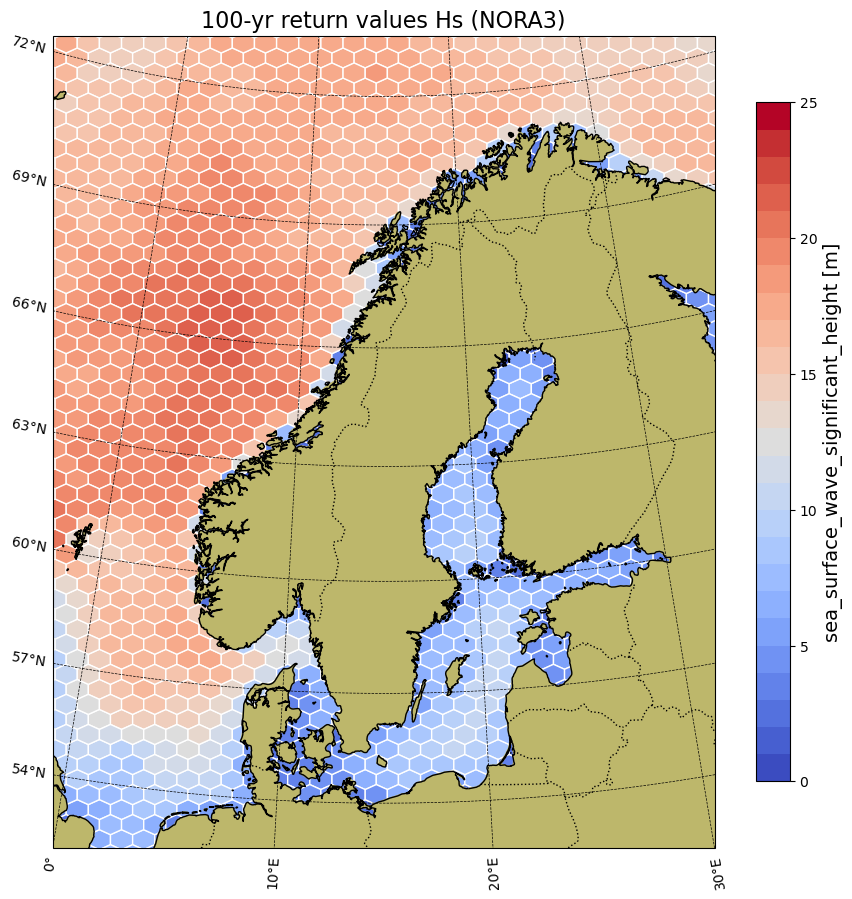

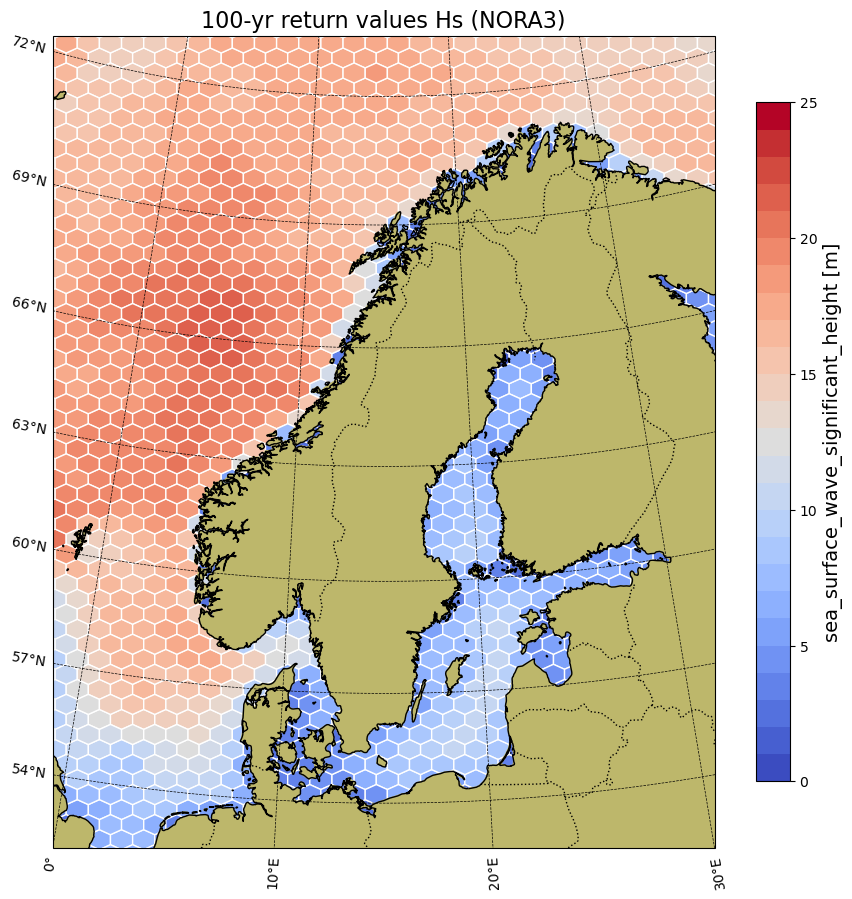

In [51]:
from metocean_stats import plots, tables, stats, maps
from metocean_stats.stats.aux_funcs import *

maps.plot_extreme_wave_map(return_period=100, product='NORA3', title='100-yr return values Hs (NORA3)', set_extent = [0,30,52,73],output_file='wave_100yrs.png')


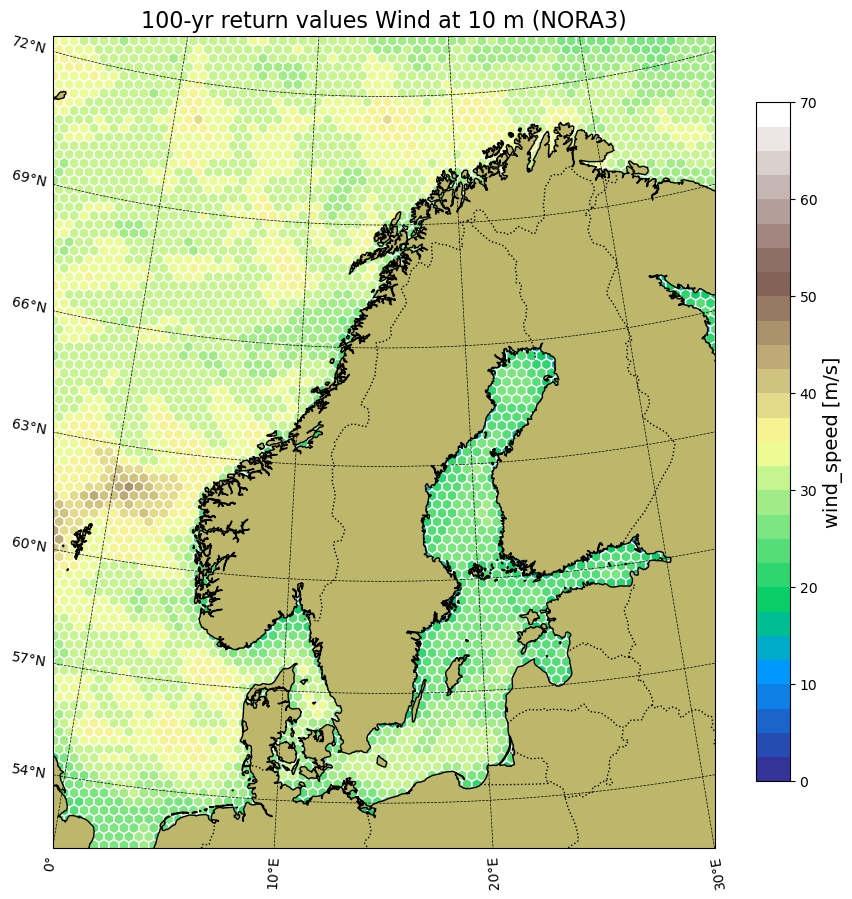

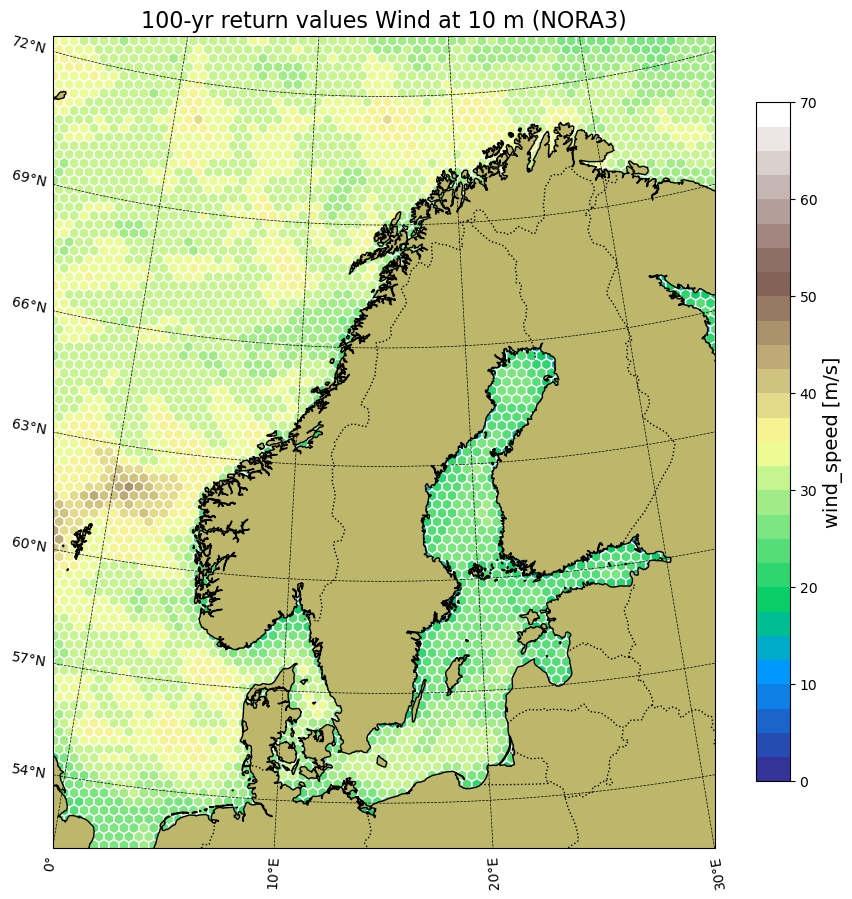

In [52]:
maps.plot_extreme_wind_map(return_period=100, product='NORA3',z=10, title='100-yr return values Wind at 10 m (NORA3)', set_extent = [0,30,52,73], output_file='wind_100yrs_10m.png')

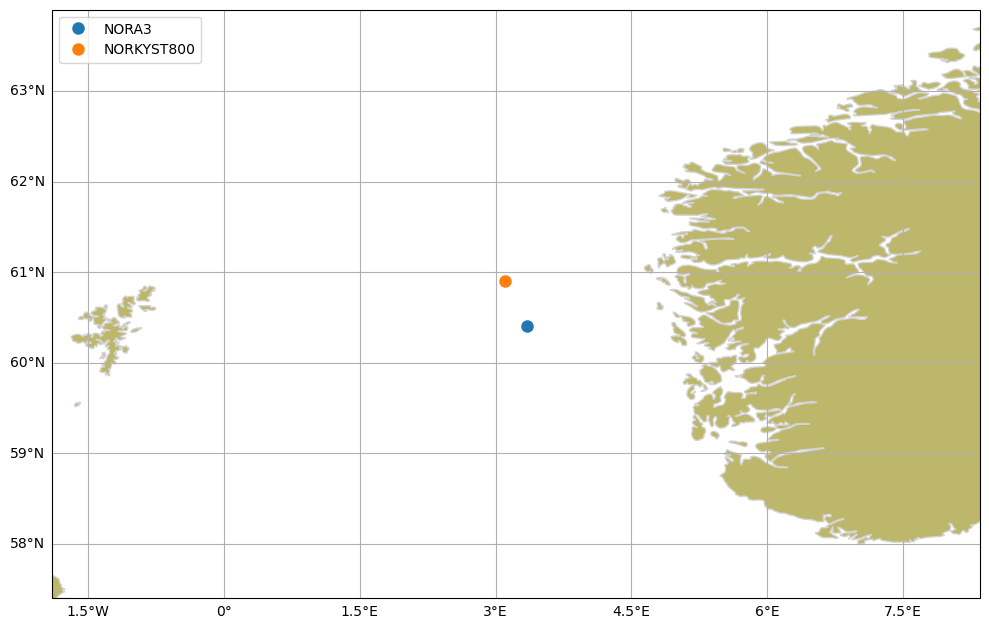

In [58]:
from metocean_stats import plots, tables, stats, maps
from metocean_stats.stats.aux_funcs import *

#df = readNora10File('../tests/data/NORA_test.txt') 

# Map:
maps.plot_points_on_map(lon=[3.35,3.10], lat=[60.40,60.90],label=['NORA3','NORKYST800'],bathymetry='NORKYST800',output_file='map.png')
#maps.plot_extreme_wave_map(return_period=100, product='NORA3', title='100-yr return values Hs (NORA3)', set_extent = [0,30,52,73],output_file='wave_100yrs.png')
#maps.plot_extreme_wind_map(return_period=100, product='NORA3',z=10, title='100-yr return values Wind at 100 m (NORA3)', set_extent = [0,30,52,73], output_file='wind_100yrs.png')



In [59]:
df_ts.data

wind_speed_10m  wind_direction_10m  wind_speed_20m  \
time                                                                      
2020-01-01 00:00:00           20.34               249.0           21.46   
2020-01-01 01:00:00           20.13               249.2           21.23   
2020-01-01 02:00:00           19.40               249.2           20.50   
2020-01-01 03:00:00           17.27               254.8           18.15   
2020-01-01 04:00:00           17.80               247.6           18.95   
...                             ...                 ...             ...   
2020-12-31 19:00:00            9.87                 3.3           10.17   
2020-12-31 20:00:00           10.33                 2.9           10.67   
2020-12-31 21:00:00           10.26                 3.1           10.59   
2020-12-31 22:00:00           10.58                 2.4           10.93   
2020-12-31 23:00:00           10.78                 2.0           11.14   

                     wind_direction_20m  wind_speed_50m  wind_direction_50m  \
time                                                                          
2020-01-01 00:00:00               249.1           23.33               249.3   
2020-01-01 01:00:00               249.3           23.12               249.6   
2020-01-01 02:00:00               249.3           22.24               249.6   
2020-01-01 03:00:00               254.8           19.74               255.1   
2020-01-01 04:00:00               247.6           20.61               247.9   
...                                 ...             ...                 ...   
2020-12-31 19:00:00                 3.3           10.62                 3.5   
2020-12-31 20:00:00                 3.0           11.15                 3.1   
2020-12-31 21:00:00                 3.2           11.06                 3.3   
2020-12-31 22:00:00                 2.5           11.44                 2.6   
2020-12-31 23:00:00                 2.0           11.67                 2.1   

                     wind_speed_100m  wind_direction_100m  wind_speed_250m  \
time                                                                         
2020-01-01 00:00:00            24.60                249.6            27.02   
2020-01-01 01:00:00            24.55                250.0            26.95   
2020-01-01 02:00:00            23.76                249.9            26.07   
2020-01-01 03:00:00            21.17                255.5            23.22   
2020-01-01 04:00:00            21.98                248.3            24.16   
...                              ...                  ...              ...   
2020-12-31 19:00:00            10.88                  3.6            11.12   
2020-12-31 20:00:00            11.43                  3.3            11.68   
2020-12-31 21:00:00            11.33                  3.5            11.56   
2020-12-31 22:00:00            11.74                  2.7            12.00   
2020-12-31 23:00:00            11.99                  2.2            12.26   

                     wind_direction_250m  ...  hs_swell     thq  thq_sea  \
time                                      ...                              
2020-01-01 00:00:00                250.7  ...      0.98   71.88    70.24   
2020-01-01 01:00:00                251.1  ...      1.00   72.25    70.83   
2020-01-01 02:00:00                250.9  ...      1.01   73.63    71.91   
2020-01-01 03:00:00                256.4  ...      1.02   74.68    72.17   
2020-01-01 04:00:00                249.4  ...      1.08   75.79    72.43   
...                                  ...  ...       ...     ...      ...   
2020-12-31 19:00:00                  3.9  ...      0.25  173.07   184.52   
2020-12-31 20:00:00                  3.6  ...      0.86  171.82   182.49   
2020-12-31 21:00:00                  4.1  ...      0.85  170.99   181.62   
2020-12-31 22:00:00                  3.0  ...      0.86  170.32   181.07   
2020-12-31 23:00:00                  2.5  ...      0.89  169.34   180.55   

             

Help on function var_rose in module metocean_stats.plots.dir:

var_rose(data, var_dir, var, method='overall', max_perc=40, decimal_places=1, units='m/s', single_figure=True, output_file='rose.png')



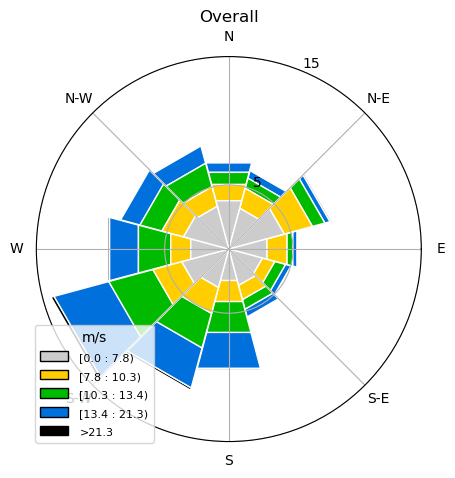

In [63]:
plots.var_rose(df_ts.data,var_dir='wind_direction_10m',var='wind_speed_10m',method='overall',max_perc=10,decimal_places=1, units='m/s')#,output_file='wind_omni.png')


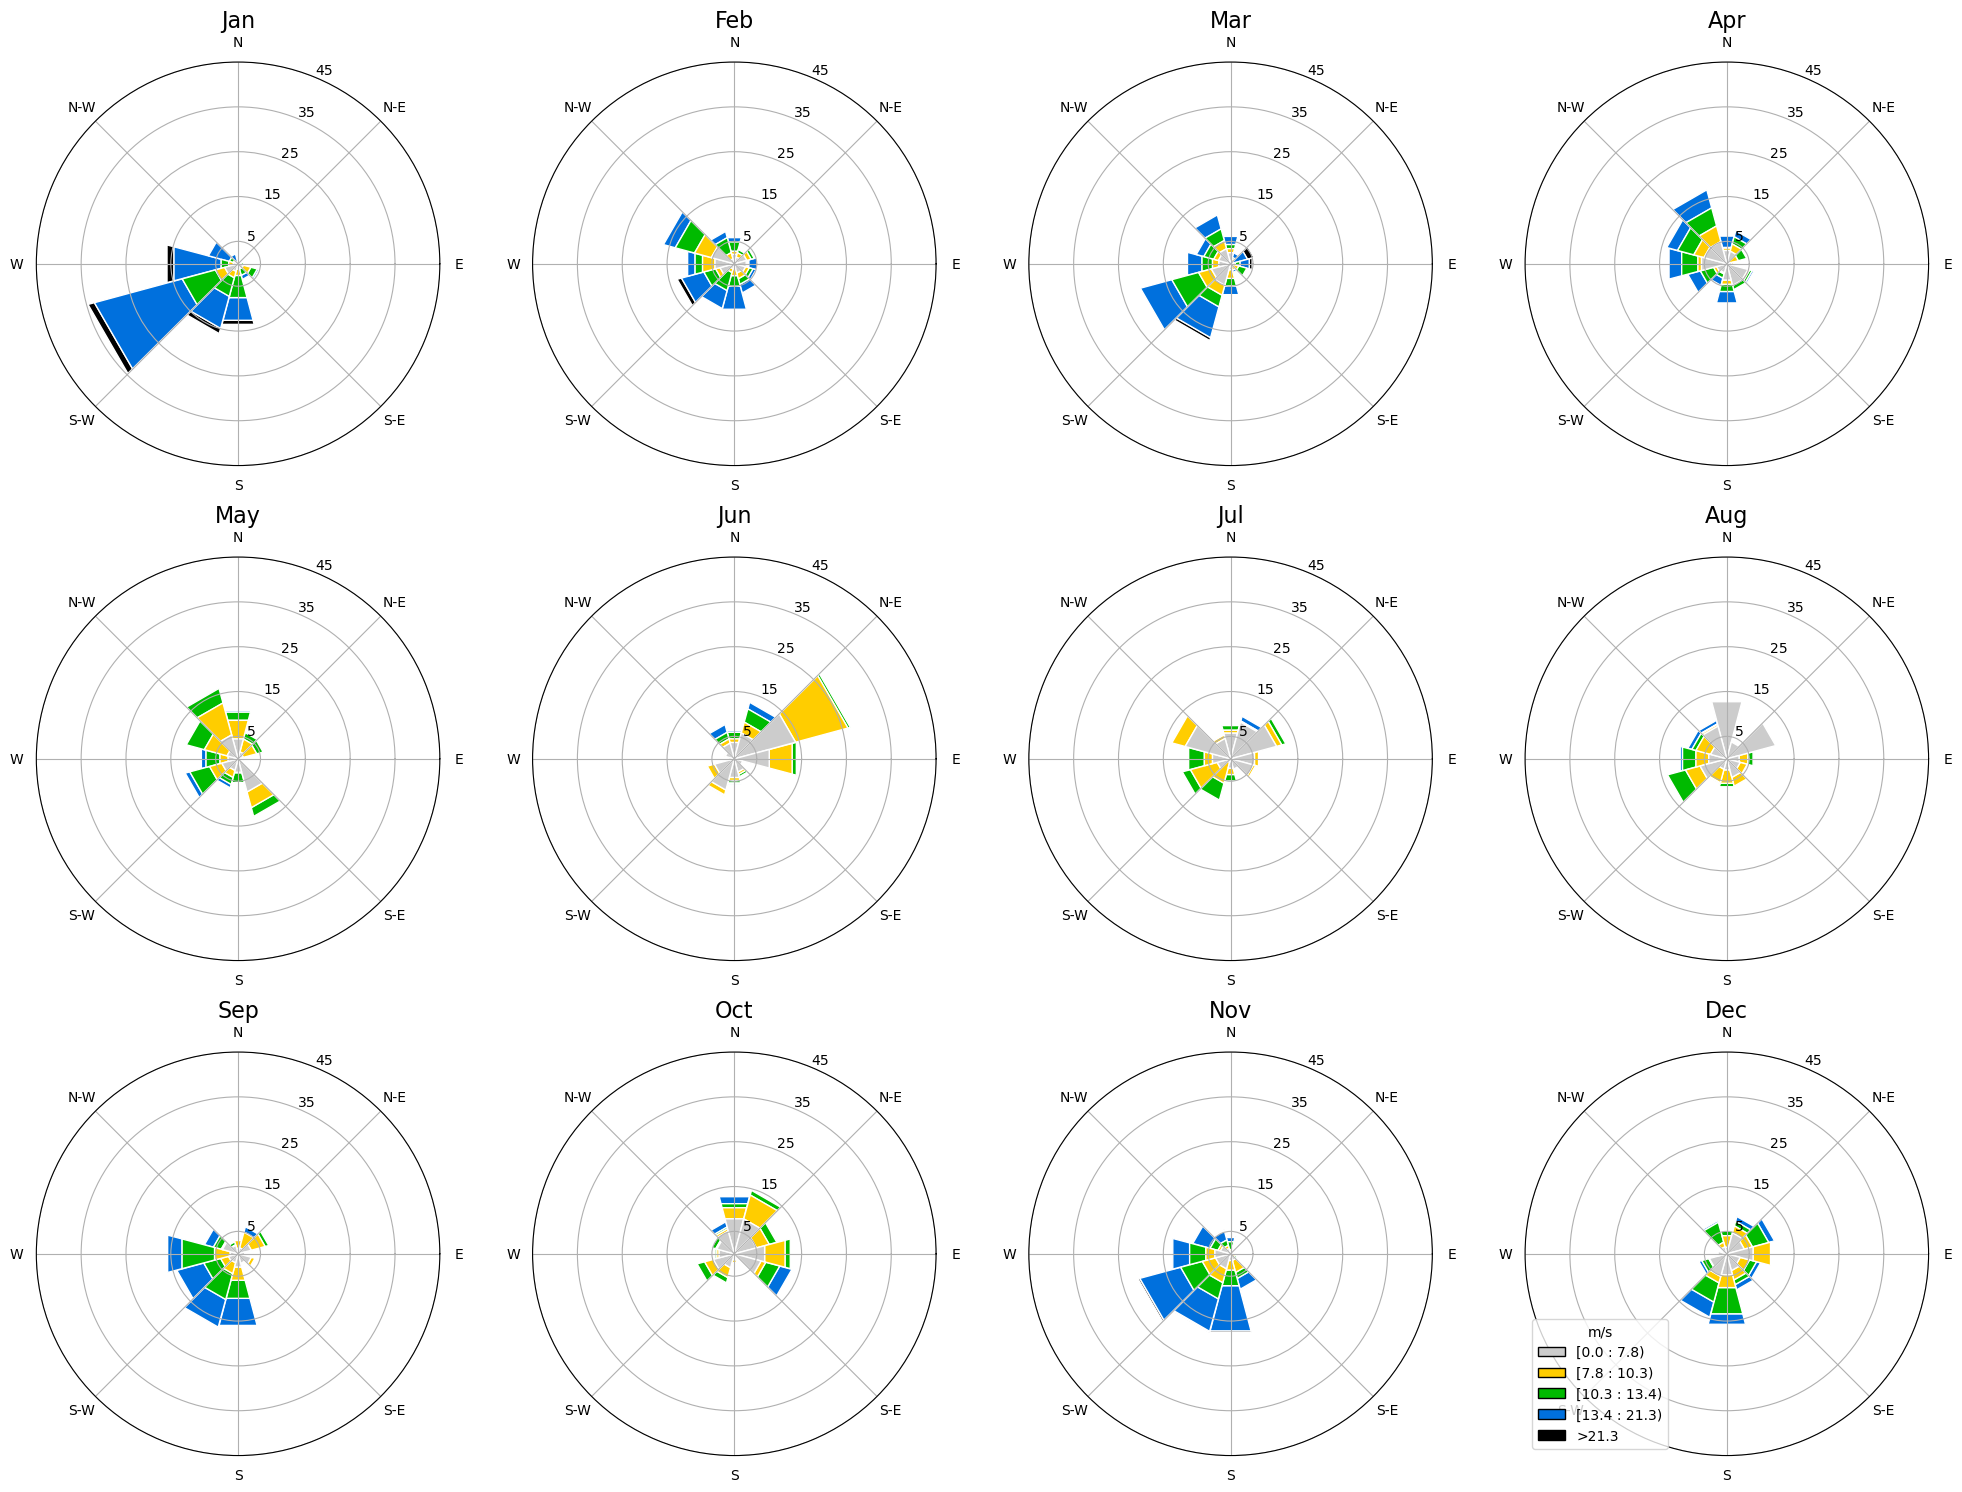

In [65]:
plots.var_rose(df_ts.data,var_dir='wind_direction_10m',var='wind_speed_10m',method='monthly',max_perc=40,decimal_places=1, units='m/s')#,output_file='wind_omni.png')


/Users/guttorm/anaconda3/envs/ocean/lib/python3.12/site-packages/metocean_stats/stats/aux_funcs.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['direction_sector'].fillna(0, inplace=True)
/Users/guttorm/anaconda3/envs/ocean/lib/python3.12/site-packages/metocean_stats/tables/general.py:372: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cumulative_percentage = cumulative_percentage.fillna(method='ffill')


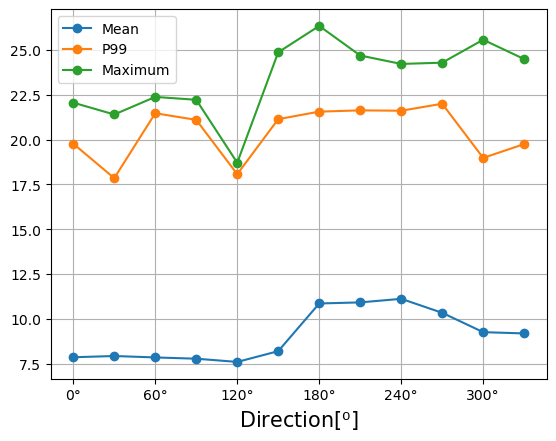

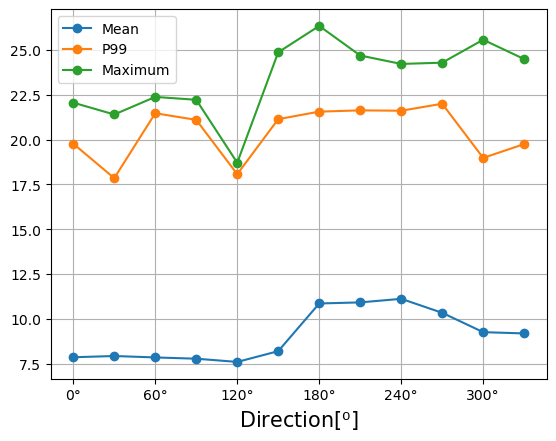

In [66]:
plots.plot_directional_stats(df_ts.data,var='wind_speed_10m',step_var=0.1,var_dir='wind_direction_10m',title = '', output_file='directional_stats.png')


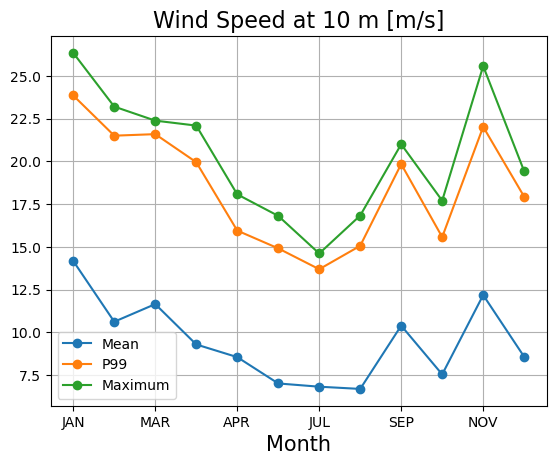

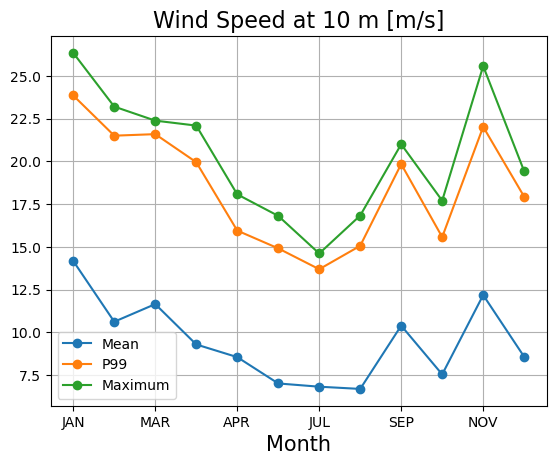

In [67]:
plots.plot_monthly_stats(df_ts.data,var='wind_speed_10m',title = 'Wind Speed at 10 m [m/s]', output_file='monthly_stats.png')

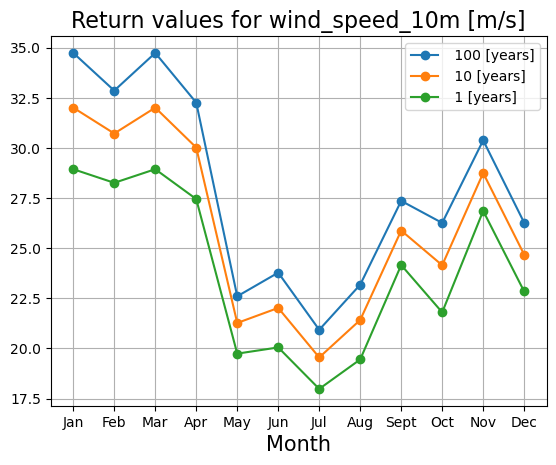

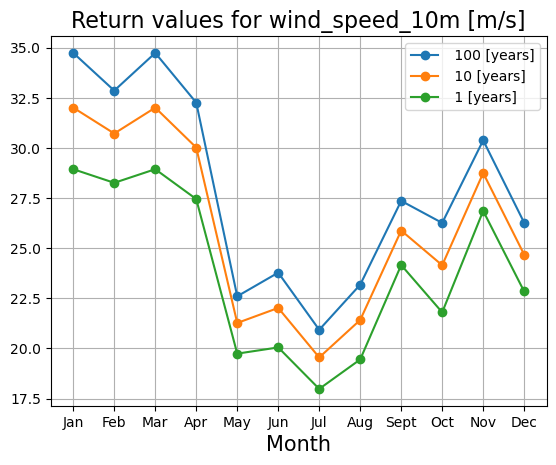

In [68]:
plots.plot_monthly_return_periods(df_ts.data,var='wind_speed_10m',periods=[1, 10, 100],distribution='Weibull3P_MOM', units='m/s',output_file='W10_monthly_extremes.png')


1
2
3
4
5
6
7
8
9
10
11
12


(<Figure size 1200x600 with 1 Axes>, <matplotlib.table.Table at 0x2e316ffb0>)

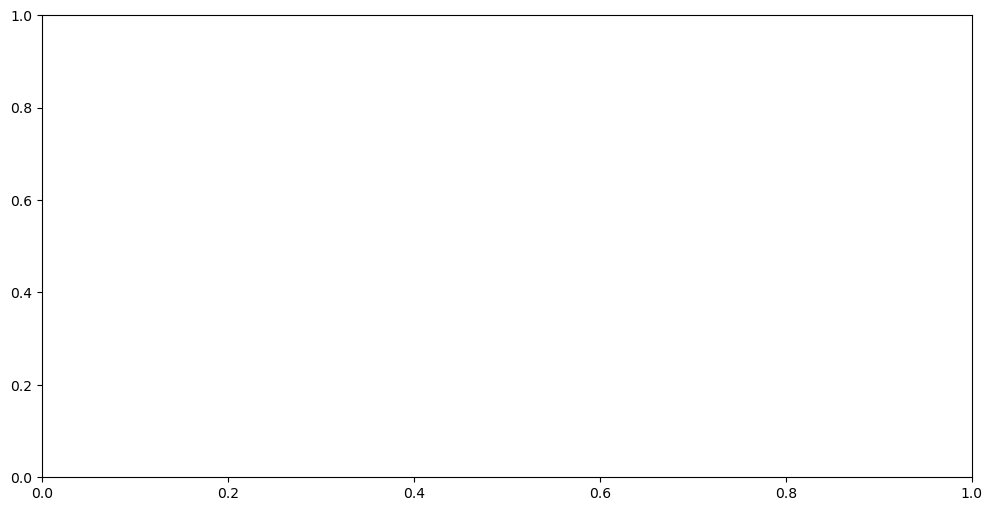

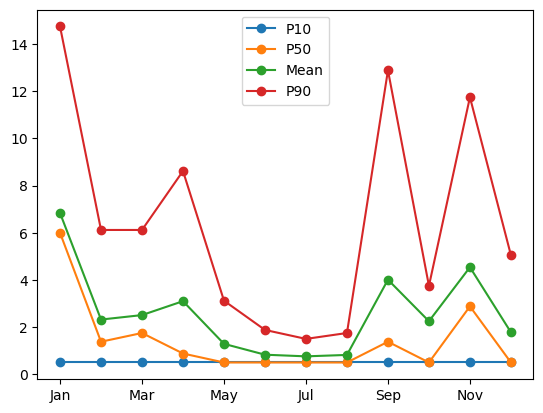

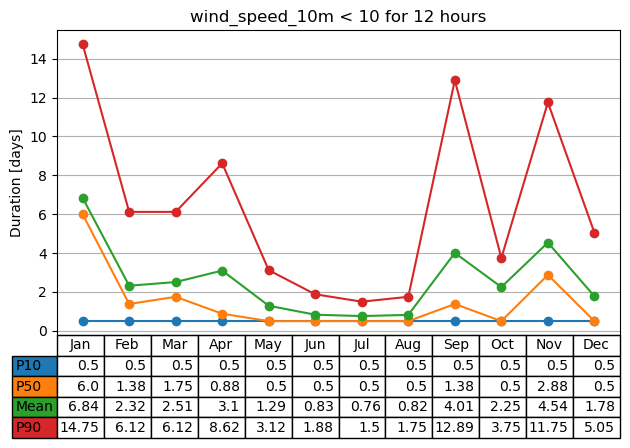

In [69]:
plots.plot_monthly_weather_window(df_ts.data,var='wind_speed_10m',threshold=10, window_size=12,output_file= 'NORA10_monthly_weather_window4_12_plot.png')


In [ ]:

# Wind:
plots.var_rose(df,var_dir='D10',var='W10',method='overall',max_perc=40,decimal_places=1, units='m/s',output_file='wind_omni.png')
plots.var_rose(df,var_dir='D10',var='W10',method='monthly',max_perc=40,decimal_places=1, units='m/s',output_file='wind_monthly.png')
plots.plot_directional_stats(df,var='W10',step_var=0.1,var_dir='D10',title = '', output_file='directional_stats.png')
plots.table_directional_non_exceedance(df,var='W10',step_var=2,var_dir='D10',output_file='table_directional_non_exceedance.csv')
plots.plot_monthly_stats(df,var='W10',title = 'Wind Speed at 10 m [m/s]', output_file='monthly_stats.png')
tables.table_monthly_non_exceedance(df,var='W10',step_var=2,output_file='table_monthly_non_exceedance.csv')
plots.plot_prob_non_exceedance_fitted_3p_weibull(df,var='W10',output_file='prob_non_exceedance_fitted_3p_weibull.png')
plots.plot_monthly_return_periods(df,var='W10',periods=[1, 10, 100],distribution='Weibull3P_MOM', units='m/s',output_file='W10_monthly_extremes.png')
plots.plot_directional_return_periods(df,var='W10',var_dir='D10',periods=[1, 10, 100],distribution='Weibull3P_MOM', units='m/s',adjustment='NORSOK',output_file='W10_dir_extremes_Weibull_norsok.png')
plots.plot_monthly_weather_window(df,var='W10',threshold=10, window_size=12,output_file= 'NORA10_monthly_weather_window4_12_plot.png')
plots.plot_scatter(df,var1='W10',var2='W100',var1_units='m/s',var2_units='m/s', title='Scatter',regression_line=True,qqplot=False,density=True,output_file='scatter_plot.png')
plots.plot_multi_diagnostic_return_levels(df, var='HS', periods=[10, 100],threshold=None,output_file='plot_diagnostic_return_levels.png')

# Waves:
plots.plot_prob_non_exceedance_fitted_3p_weibull(df,var='HS',output_file='prob_non_exceedance_fitted_3p_weibull.png')
tables.scatter_diagram(df, var1='HS', step_var1=1, var2='TP', step_var2=1, output_file='Hs_Tp_scatter.csv')
tables.table_var_sorted_by_hs(df, var='TP', var_hs='HS', output_file='Tp_sorted_by_Hs.csv')
tables.table_monthly_non_exceedance(df,var='HS',step_var=0.5,output_file='Hs_table_monthly_non_exceedance.csv')
plots.plot_monthly_stats(df,var='HS',show=['Maximum','P99','Mean'], title = 'Hs[m]', output_file='Hs_monthly_stats.png')
tables.table_directional_non_exceedance(df,var='HS',step_var=0.5,var_dir='DIRM',output_file='table_directional_non_exceedance.csv')
plots.plot_directional_stats(df,var='HS',step_var=0.5, var_dir='DIRM', title = '$H_s$[m]', output_file='directional_stats.png')
plots.plot_joint_distribution_Hs_Tp(df,var_hs='HS',var_tp='TP',periods=[1,10,100,1000], title='Hs-Tp joint distribution',output_file='Hs.Tp.joint.distribution.png',density_plot=True)
tables.table_monthly_joint_distribution_Hs_Tp_param(df,var_hs='HS',var_tp='TP',periods=[1,10,100,10000],output_file='monthly_Hs_Tp_joint_param.csv')
tables.table_directional_joint_distribution_Hs_Tp_param(df,var_hs='HS',var_tp='TP',var_dir='DIRM',periods=[1,10,100],output_file='dir_Hs_Tp_joint_param.csv')
plots.plot_monthly_weather_window(df,var='HS',threshold=4, window_size=12,output_file= 'NORA10_monthly_weather_window4_12_plot.png')
tables.table_monthly_return_periods(df,var='HS',periods=[1, 10, 100, 10000],distribution='Weibull3P_MOM', units='m',output_file='HS_monthly_extremes_Weibull.csv')
tables.table_directional_return_periods(df,var='HS',periods=[1, 10, 100, 10000], units='m',var_dir = 'DIRM',distribution='Weibull3P_MOM', adjustment='NORSOK' ,output_file='directional_extremes_weibull.csv')
plots.plot_monthly_return_periods(df,var='HS',periods=[1, 10, 100],distribution='Weibull3P_MOM', units='m',output_file='HS_monthly_extremes.png')
plots.plot_directional_return_periods(df,var='HS',var_dir='DIRM',periods=[1, 10, 100, 10000 ],distribution='GUM', units='m',output_file='dir_extremes_GUM.png')
plots.plot_directional_return_periods(df,var='HS',var_dir='DIRM',periods=[1, 10, 100, 10000],distribution='Weibull3P_MOM', units='m',adjustment='NORSOK',output_file='dir_extremes_Weibull_norsok.png')
tables.table_monthly_joint_distribution_Hs_Tp_return_values(df,var_hs='HS',var_tp='TP',periods=[1,10,100,10000],output_file='monthly_Hs_Tp_joint_return_values.csv')
tables.table_directional_joint_distribution_Hs_Tp_return_values(df,var_hs='HS',var_tp='TP',var_dir='DIRM',periods=[1,10,100,1000],adjustment='NORSOK',output_file='directional_Hs_Tp_joint_return_values.csv')
tables.table_Hs_Tpl_Tph_return_values(df,var_hs='HS',var_tp='TP',periods=[1,10,100,10000],output_file='hs_tpl_tph_return_values.csv')
plots.plot_tp_for_given_hs(df, 'HS', 'TP',output_file='tp_for_given_hs.png')
tables.table_tp_for_given_hs(df, 'HS', 'TP',max_hs=20,output_file='tp_for_given_hs.csv')
tables.table_tp_for_rv_hs(df, var_hs='HS', var_tp='TP',periods=[1,10,100,10000],output_file='tp_for_rv_hs.csv')
tables.table_wave_induced_current(df, var_hs='HS',var_tp='TP',depth=200,ref_depth=200, spectrum = 'JONSWAP',output_file='JONSWAP_wave_induced_current_depth200.csv')
tables.table_wave_induced_current(df, var_hs='HS',var_tp='TP',depth=200,ref_depth=200, spectrum = 'TORSEHAUGEN',output_file='TORSEHAUGEN_wave_induced_current_depth200.csv')
tables.table_hs_for_given_wind(df, 'HS','W10', bin_width=2, max_wind=42, output_file='table_perc_hs_for_wind.csv')
plots.plot_hs_for_given_wind(df, 'HS', 'W10',output_file='hs_for_given_wind.png')
tables.table_hs_for_rv_wind(df, var_wind='W10', var_hs='HS',periods=[1,10,100,10000],output_file='hs_for_rv_wind.csv')
tables.table_Hmax_crest_return_periods(df,var_hs='HS', var_tp='TP', depth=200, periods=[1, 10, 100,10000],sea_state='long-crested',output_file='table_Hmax_crest_rp.csv')
tables.table_directional_Hmax_return_periods(df,var_hs='HS', var_tp = 'TP',var_dir='DIRM', periods=[10, 100,10000],adjustment='NORSOK', output_file='table_dir_Hmax_return_values.csv')


# Air Temperature:
plots.plot_monthly_return_periods(df,var='T2m',periods=[1, 10, 100],distribution='GUM_L',method='minimum', units='°C',output_file='T2m_monthly_extremes_neg.png')
tables.table_monthly_return_periods(df,var='T2m',periods=[1, 10, 100],distribution='GUM_L', method='minimum' ,units='°C',output_file='T2m_monthly_extremes_neg.csv')
plots.plot_monthly_return_periods(df,var='T2m',periods=[1, 10, 100],distribution='GUM', method='maximum', units='°C',output_file='T2m_monthly_extremes_pos.png')
tables.table_monthly_return_periods(df,var='T2m',periods=[1, 10, 100],distribution='GUM', method='maximum' ,units='°C',output_file='T2m_monthly_extremes_pos.csv')
plots.plot_monthly_stats(df,var='T2m',show=['Minimum','Mean','Maximum'], title = 'T2m', output_file='T2m_monthly_stats.png')
tables.table_monthly_non_exceedance(df,var='T2m',step_var=0.5,output_file='T2m_table_monthly_non_exceedance.csv')


# Currents:
#import pandas as pd
#ds_ocean = pd.read_csv('../tests/data/NorkystDA_test.csv',comment='#',index_col=0, parse_dates=True)
#depth = ['0m', '1m', '2.5m', '5m', '10m', '15m', '20m', '25m', '30m', '40m', '50m', '75m', '100m', '150m', '200m']

#ds_all = pd.concat([ds.loc['2017-01-02 00:00:00':'2018-12-31 21:00:00'], ds_ocean.resample('3h').mean()], axis=1)
#ds_all = ds_all.dropna(how='all')


#plots.plot_monthly_return_periods(ds_ocean,var='current_speed_0m',periods=[1, 10, 100],distribution='Weibull3P_MOM',method='POT',threshold='P99', units='m/s',output_file='csp0m_monthly_extremes.png')
#plots.var_rose(df, f'current_direction_{depth}',f'current_speed_{depth}',max_perc=30,decimal_places=2, units='m/s', method='monthly', output_file='monthly_rose.png')
#plots.var_rose(df,f'current_direction_{depth}',f'current_speed_{depth}',max_perc=30,decimal_places=2, units='m/s', method='overall', output_file='overall_rose.png')
#plots.plot_monthly_stats(df,var1=f'current_speed_{depth}',show=['Mean','P99','Maximum'], title = f'Current[m/s], depth:{depth}', output_file=f'current{depth}_monthly_stats.png')
#plots.plot_directional_stats(df,var1=f'current_speed_{depth}',var_dir=f'current_direction_{depth}',step_var1=0.05,show=['Mean','P99','Maximum'], title = f'Current[m/s], depth:{depth}', output_file=f'current{depth}_dir_stats.png')
#tables.table_directional_return_periods(df,var=f'current_speed_{depth}',periods=[1, 10, 100, 10000], units='m/s',var_dir = f'current_direction_{depth}',distribution='Weibull', adjustment='NORSOK' ,output_file=f'directional_extremes_weibull_current{depth}.csv')
#tables.table_monthly_return_periods(df,var=f'current_speed_{depth}',periods=[1, 10, 100, 10000], units='m/s',distribution='Weibull3P_MOM',method='POT',threshold='P99',output_file=f'monthly_extremes_weibull_current{depth}.csv')
#df = tables.table_monthly_return_periods(df,var='HS',periods=[1, 10, 100, 10000], units='m',distribution='Weibull3P_MOM',method='POT',threshold='P99',output_file='HS_monthly_extremes_Weibull_POT_P99.csv')
#df = tables.table_monthly_return_periods(df,var='HS',periods=[1, 10, 100, 10000],distribution='Weibull3P_MOM', units='m',output_file='HS_monthly_extremes_Weibull.csv')
#df = tables.table_directional_return_periods(df,var='HS',var_dir='DIRM',periods=[1, 10, 100, 10000],distribution='Weibull3P_MOM', units='m',output_file='HS_dir_extremes_Weibull.csv')
#df = tables.table_directional_return_periods(df,var='HS',var_dir='DIRM',periods=[1, 10, 100, 10000],distribution='Weibull3P_MOM',method='POT',threshold='P99', units='m',output_file='HS_dir_extremes_Weibull_POT.csv')
# plots.plot_directional_return_periods(df,var='HS',var_dir='DIRM',periods=[1, 10, 100, 10000],distribution='Weibull3P_MOM', units='m',adjustment='NORSOK',method='POT',threshold='P99',output_file='dir_extremes_Weibull_norsok.png')
# df = tables.table_profile_return_values(df,var=['W10','W50','W80','W100','W150'], z=[10, 50, 80, 100, 150], periods=[1, 10, 100, 10000], output_file='RVE_wind_profile.csv')
#fig = plots.plot_profile_return_values(ds_ocean,var=['current_speed_' + d for d in depth], z=[float(d[:-1]) for d in depth], periods=[1, 10, 100, 10000],reverse_yaxis=True, output_file='RVE_current_profile.png')
#df = tables.table_current_for_given_wind(ds_all, var_curr='current_speed_0m', var_wind='W10', bin_width=2, max_wind=42, output_file='table_perc_current_for_wind.csv')
#plots.plot_current_for_given_wind(ds_all, var_curr='current_speed_0m', var_wind='W10',max_wind=40 ,output_file='curr_for_given_wind.png')
#df = tables.table_current_for_given_hs(ds_all, var_curr='current_speed_0m', var_hs='HS', bin_width=2, max_hs=20, output_file='table_perc_current_for_Hs.csv')
#ds['current_speed_0m'] = 0.05*ds['W10']
#df = tables.table_current_for_given_wind(df, var_curr='current_speed_0m', var_wind='W10', bin_width=2, max_wind=42, output_file='table_perc_current_for_wind.csv')
#df = tables.table_current_for_given_hs(df, var_curr='current_speed_0m', var_hs='HS', bin_width=2, max_hs=20, output_file='table_perc_current_for_Hs.csv')

#plots.plot_current_for_given_hs(ds_all, var_curr='current_speed_0m', var_hs='HS', max_hs=20, output_file='curr_for_given_hs.png')
#df = tables.table_extreme_current_profile_rv(ds_ocean, var=['current_speed_' + d for d in depth], z=[float(d[:-1]) for d in depth], periods=[1,100,1000],percentile=95, output_file='table_extreme_current_profile_rv.png')
#df = tables.table_profile_stats(ds_ocean, var=['current_speed_' + d for d in depth], z=[float(d[:-1]) for d in depth], var_dir=['current_direction_' + d for d in depth], output_file='table_profile_stats.csv')
#fig = plots.plot_profile_stats(ds_ocean,var=['current_speed_' + d for d in depth], z=[float(d[:-1]) for d in depth],reverse_yaxis=True, output_file='stats_current_profile.png')
#df = tables.table_current_for_rv_wind(ds_all, var_curr='current_speed_0m', var_wind='W10',periods=[1,10,100,10000],output_file='Uc_for_rv_wind.csv')
#df = tables.table_current_for_rv_hs(ds_all, var_curr='current_speed_0m', var_hs='HS',periods=[1,10,100,10000],output_file='Uc_for_rv_hs.csv')


# Sea temperature
# df = tables.table_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='mean', output_file='table_mean_temp_profile_monthly_stats.png')
# df = tables.table_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='std.dev', output_file='table_std_temp_profile_monthly_stats.png')
# df = tables.table_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='minimum', output_file='table_min_temp_profile_monthly_stats.png')
# df = tables.table_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='maximum', output_file='table_max_temp_profile_monthly_stats.png')

# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='mean',title='Mean Sea Temperature [°C]', output_file='plot_mean_temp_profile_monthly_stats.png')
# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='std.dev',title='St.Dev Sea Temperature [°C]', output_file='plot_std_temp_profile_monthly_stats.png')
# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='minimum',title='Min. Sea Temperature [°C]', output_file='plot_min_temp_profile_monthly_stats.png')
# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['temp_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='maximum',title='Max. Sea Temperature [°C]', output_file='plot_max_temp_profile_monthly_stats.png')

# # Sainity:
# df = tables.table_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='mean', output_file='table_mean_sal_profile_monthly_stats.png')
# df = tables.table_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='std.dev', output_file='table_std_sal_profile_monthly_stats.png')
# df = tables.table_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='minimum', output_file='table_min_sal_profile_monthly_stats.png')
# df = tables.table_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='maximum', output_file='table_max_sal_profile_monthly_stats.png')

# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='mean',title='Mean Salinity [PSU]', output_file='plot_mean_sal_profile_monthly_stats.png')
# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='std.dev',title='St.Dev Salinity [PSU]', output_file='plot_std_sal_profile_monthly_stats.png')
# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='minimum',title='Min. Salinity [PSU]', output_file='plot_min_sal_profile_monthly_stats.png')
# fig = plots.plot_profile_monthly_stats(ds_ocean, var=['salt_' + d for d in depth], z=[float(d[:-1]) for d in depth], method='maximum',title='Max. Salinity [PSU]', output_file='plot_max_sal_profile_monthly_stats.png')


# Water levels:
#ds_tide = pd.read_csv('../tests/data/GTSM_test.csv',comment='#',index_col=0, parse_dates=True)
#df = tables.table_tidal_levels(ds_tide, var='tide', output_file='tidal_levels.csv')
#fig = plots.plot_tidal_levels(ds_tide, var='tide',start_time='2010-01-01',end_time='2010-03-30', output_file='tidal_levels.png')
#df = tables.table_storm_surge_for_given_hs(ds_all, var_surge='zeta_0m', var_hs='HS', bin_width=1, max_hs=20, output_file='table_perc_surge_for_Hs.csv')
#fig = plots.plot_storm_surge_for_given_hs(df,var_surge='zeta_0m', var_hs='HS', max_hs=20, output_file='surge_for_given_hs.png')
#df = tables.table_extreme_total_water_level(df, var_hs='HS',var_tp='TP',var_surge='zeta_0m', var_tide='tide', periods=[100,10000], output_file='table_extreme_total_water_level.csv')
#df = tables.table_storm_surge_for_rv_hs(df, var_hs='HS',var_tp='TP',var_surge='zeta_0m', var_tide='tide', periods=[1,10,100,10000],depth=200, output_file='table_storm_surge_for_rv_hs.csv')